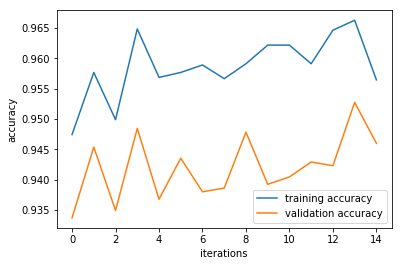

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

NUMBER_OF_ITERATION = 15
def get_labels(k):
   label = ['label']
   for i in range(1,k+1):
       label.append(str(i))
   return label
def add_bias(data):
   data['785'] = np.array([1]*data.shape[0])
   return data
def kp(x,y,p=1):
   value = 1 + np.matmul(x,np.transpose(y))
   value = np.power(value,p)
   return value
def get_Y_and_X(data):
   y = data['label'].apply(lambda x: 1 if x==3 else -1)
   x = data.drop(['label'],1)
   return x,y

train_df,Y = get_Y_and_X(add_bias(pd.read_csv('pa2_train.csv',names=get_labels(784))))
valid_df, VY = get_Y_and_X(add_bias(pd.read_csv('pa2_valid.csv',names=get_labels(784))))

# df = pd.read_csv("pa2_train.csv");
# # df.columns = [str(i) for i in range(0, df.shape[1])]
# df2 = pd.read_csv("pa2_valid.csv");
# df2.columns = [str(i) for i in range(0, df.shape[1])]
# # df["bias"] = 1.0;
# df2["bias"] = 1.0;
# df.sample(5)
# # Y=df["0"]
# # Y = Y.apply(lambda x: 1 if x == 3 else -1)
# VY=df2["0"]
# VY = VY.apply(lambda x: 1 if x == 3 else -1)
# # train_df = df.drop(["0"], axis=1)
# valid_df = df2.drop(["0"], axis=1)

(n, features) = train_df.shape

(vn, vfeatures) = valid_df.shape

W = [0 for x in range(0, features)]
W = np.array(W)
iters = 15; _iter = 0;
training_error = []
validation_error = []
train_accuracy = []
validation_accuracy = []
weightsMap = {}
maxAccuracy = 0
maxAccuracyIndex = 0
while _iter < iters:
    error = 0;
    v_error = 0;
    for i in range(0, n):
        x = train_df.iloc[i]
        u = W.dot(x)
        yi = Y.iloc[i]
        if yi*u <= 0:
            W = np.add(W,np.multiply(yi,x))
    for i in range(0, n):
        x = train_df.iloc[i]
        u = W.dot(x)
        yi = Y.iloc[i]
        if yi*u <= 0:
            error+=1  
    weightsMap[_iter] = W
    training_error.append(error)
    t_accuracy = 1-(error/n);
    train_accuracy.append(t_accuracy)
    for i in range(0, vn):
        vx = valid_df.iloc[i]
        vu = np.array([W]).dot(vx)
        vyi = VY.iloc[i]
        if vyi*vu <= 0:
            v_error += 1;
    validation_error.append(v_error)
    v_accuracy = 1-(v_error/vn);
    validation_accuracy.append(v_accuracy)
    _iter+=1
t, = plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], train_accuracy, label="training accuracy")
v, = plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], validation_accuracy, label="validation accuracy")
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.legend(handles=[t,v], loc='best')


    



    

        
        
    


In [49]:
print(validation_accuracy)

[0.9337016574585635, 0.94536525475752, 0.9349294045426642, 0.9484346224677717, 0.9367710251688153, 0.943523634131369, 0.937998772252916, 0.9386126457949663, 0.9478207489257213, 0.9392265193370166, 0.9404542664211173, 0.9429097605893186, 0.9422958870472683, 0.952731737262124, 0.9459791282995703]


In [50]:
WW=weightsMap[13]

In [51]:
print(X.shape)

(785,)


In [28]:
train_df.head()

,1,2,3,4,5,6,7,8,9,10,...,776,777,778,779,780,781,782,783,784,785
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


The train accuracy does not reach 100% because the data may not be linearly seperable. Some instances of 5s may look like 3 or some 3s may look like 5

In [42]:
#predict_df = pd.read_csv("pa2_test_no_label.csv")
predict_df = add_bias(pd.read_csv('pa2_test_no_label.csv',names=get_labels(784)[1:]))
a = (np.array([WW]))
print(a.shape)
# for i in range(0, train_df.shape[0]):
#     X = train_df.iloc[i]
#     #y_ = np.sign(WW.dot(X))
#     y_ = np.multiply(np.transpose(WW), np.transpose(X))
#     predict_df.at["label", i] = y_
# predict_df.sample(5)

y_ = a.dot(np.transpose(predict_df))



(1, 785)


In [43]:
predict_df.head()

,1,2,3,4,5,6,7,8,9,10,...,776,777,778,779,780,781,782,783,784,785
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [44]:
print(y_)

[[-10760709.80341084 -11564992.23845502  -6285356.7625284  ...
   -4076231.19992928  10654768.12378588  -7811490.49069834]]


In [45]:
print(np.sign(y_))

[[-1. -1. -1. ... -1.  1. -1.]]


In [46]:
p = pd.DataFrame(np.sign(y_)).T

In [47]:
p.to_csv("oplabel.csv", index=False, header=False)

In [35]:
predict_df.shape

(1629, 785)

In [36]:
ss = pd.read_csv("oplabel.csv")
ss.shape

(0, 1629)

In [37]:
ss.head()

,-1.0,-1.0.1,-1.0.2,1.0,-1.0.3,-1.0.4,1.0.1,-1.0.5,1.0.2,-1.0.6,...,1.0.873,-1.0.746,-1.0.747,-1.0.748,1.0.874,-1.0.749,-1.0.750,-1.0.751,1.0.875,-1.0.752


In [38]:
p.shape

(1, 1629)

In [39]:
testing_df = predict_df.head(50)
Y = []
for i in range(0, 50):
    X = testing_df.iloc[i]
    W = WW
    y_ = np.sign(W.dot(X))
    Y.append(y_)
    
print(Y)

a = (np.array([WW]))
y2_ = a.dot(np.transpose(testing_df)) 

print(np.sign(y2_))

[-1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0]
[[-1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1.  1.  1. -1. -1.
   1.  1.  1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.]]
